In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Embedding
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# in_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Training_formodeling.csv')
data = pd.read_csv('/content/data/Training_formodeling.csv')
print (data.shape)
print (data.tail())
print (data.columns)

(511, 168)
       X     ntl_ai   ntl_area_mn  ntl_cai_mn  ntl_clumpy  ntl_cohesion  \
506  509  98.544915  223621.91840   58.850294    0.963661     99.792031   
507  510  93.479343   12754.61624   44.890514    0.921634     95.214943   
508  511  93.920253   16026.29215   45.620047    0.935237     96.168747   
509  203  94.475138   37587.37437   70.157068    0.955405     97.157848   
510  204  94.736842   18203.30958   68.648649    2.147059     99.794270   

     ntl_contig_mn  ntl_dcad    ntl_ed    ntl_lpi  ...  BIH  MKD  GEO  MNG  \
506       0.827621  0.000375  0.493883  83.050222  ...    0    0    0    0   
507       0.653892  0.001685  0.842883  14.400758  ...    0    0    0    0   
508       0.733625  0.002465  1.027068  24.833232  ...    0    0    0    0   
509       0.878272  0.001114  0.718110  20.931507  ...    0    0    0    0   
510       0.863063  0.005212  0.672078  94.871795  ...    0    0    0    0   

     LAO  LTU  NAM  ARM  HRV  bins  
506    0    0    0    0    0    

In [3]:
features = list(data.columns)
features.remove('X')
remove_list=['AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ITA', 
                  'JPN', 'KOR', 'MEX', 'NLD', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'USA', 'NGA', 'BEN', 'ARE', 'VEN', 'GHA', 'SAU', 'QAT', 'YEM',
                   'TUR', 'ETH', 'AUS', 'MAR', 'IND', 'PRI', 'IRN', 'CHN', 'KAZ', 'IRQ', 'EGY', 'SYR', 'SDN', 'BHR', 'KWT','IDN', 'JOR', 'UZB', 'PHL',
                   'DZA', 'MDG', 'BRA', 'PER', 'RUS', 'COL', 'TZA', 'TKM', 'ERI', 'NZL', 'PAK', 'ARG', 'AZE', 'MLI', 'LBY', 'CAF', 'GMB', 'BGD', 'LBN', 
                  'ISR', 'MOZ', 'SRB', 'KGZ', 'GNB', 'MWI', 'ZAF', 'BFA', 'ROU', 'BDI', 'ZWE', 'CUB', 'VNM', 'MDA', 'HND', 'THA', 'GTM', 'PRY', 'BOL', 'LKA',
                   'GIN', 'ECU', 'SEN', 'DJI', 'UKR', 'CMR', 'TJK', 'SLE', 'SOM', 'AFG', 'AGO', 'MYS', 'UGA', 'NPL', 'RWA', 'JAM', 'COD', 'ZMB', 'GAB', 'NIC',
                   'MMR', 'OMN', 'KEN', 'LBR', 'URY', 'NER', 'MRT', 'PRK', 'BGR', 'COG', 'HTI', 'PNG', 'LVA', 'TUN', 'SLV', 'DOM', 'BIH', 'MKD', 'GEO', 'MNG',
                   'LAO', 'LTU', 'NAM', 'ARM', 'HRV','ntl_ai']
#  'ntl_area_mn',
#  'ntl_cai_mn',
#  'ntl_clumpy',
#  'ntl_cohesion',
#  'ntl_contig_mn',
#  'ntl_dcad',
#  'ntl_ed',
#  'ntl_lpi',
#  'ntl_lsi',
#  'ntl_np',
#  'ntl_pd',
#  'ntl_pladj',
#  'ntl_pland',
#  'ntl_shape_mn',
#  'ntl_split',
#  'ntl_te',
#  'ntl_sum',
#  'ntl_count',
#  'ntl_median',
#  'ntl_variance']
features = list(filter(lambda i: i not in remove_list, features))
label = ['bins']
X = data[features]
# y = tf.keras.utils.to_categorical(data[label])
y = data[label]
# in_data=in_data[features]
data=data[features]

In [4]:
features

['ntl_area_mn',
 'ntl_cai_mn',
 'ntl_clumpy',
 'ntl_cohesion',
 'ntl_contig_mn',
 'ntl_dcad',
 'ntl_ed',
 'ntl_lpi',
 'ntl_lsi',
 'ntl_np',
 'ntl_pd',
 'ntl_pladj',
 'ntl_pland',
 'ntl_shape_mn',
 'ntl_split',
 'ntl_te',
 'ntl_sum',
 'ntl_count',
 'ntl_median',
 'ntl_variance',
 'totpop',
 'LENGTH',
 'COUNT',
 'coastal',
 'Longitude',
 'Latitude',
 'bins']

In [5]:
# data=in_data.copy(deep=True)
# data['bins'].value_counts()
# data=in_data
# data['bins'].describe()
# X['enc']=y
# features.append('enc')
# data=in_data
X

,ntl_area_mn,ntl_cai_mn,ntl_clumpy,ntl_cohesion,ntl_contig_mn,ntl_dcad,ntl_ed,ntl_lpi,ntl_lsi,ntl_np,...,ntl_count,ntl_median,ntl_variance,totpop,LENGTH,COUNT,coastal,Longitude,Latitude,bins
0,8019.29584,31.987578,0.991340,96.312741,0.515010,0.004958,1.352351,39.268293,1.538462,2,...,414,58.550674,212.587601,5.79473,110.927546,38,0,6.109877,50.758772,13
1,12732.47708,41.162454,0.894712,96.920809,0.703259,0.003296,1.387943,30.630896,3.444444,10,...,10223,2.990611,142.315597,1.65252,614.066868,162,0,-99.733144,32.448736,16
2,11741.95465,27.259846,0.953299,97.464107,0.478443,0.001724,1.026363,36.877828,2.870370,6,...,1930,8.026603,318.314117,7.89971,553.523349,33,1,-99.714296,16.957209,12
3,14916.87423,24.053447,0.947674,98.220649,0.548300,0.002929,1.300092,52.449568,2.482143,5,...,1396,11.845265,398.389191,9.51197,103.405838,27,0,-102.295803,21.811436,14
4,425268.67020,93.475243,0.000000,100.000000,0.977711,0.000235,0.000000,100.000000,1.113636,1,...,4294,47.034832,299.757904,7.03200,885.493567,797,0,-81.519005,41.081445,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,223621.91840,58.850294,0.963661,99.792031,0.827621,0.000375,0.493883,83.050222,2.180723,3,...,8128,22.897284,342.661255,5.65773,1678.555959,1079,0,-80.663210,41.079933,19
507,12754.61624,44.890514,0.921634,95.214943,0.653892,0.001685,0.842883,14.400758,3.015385,8,...,5490,6.294368,121.529991,1.66892,238.190909,49,0,-121.616911,39.140448,13
508,16026.29215,45.620047,0.935237,96.168747,0.733625,0.002465,1.027068,24.833232,3.109589,8,...,20605,2.378984,84.184013,1.95751,277.607719,64,0,-114.627692,32.692651,15
509,37587.37437,70.157068,0.955405,97.157848,0.878272,0.001114,0.718110,20.931507,2.000000,1,...,1938,18.841157,573.972473,8.25838,70.702273,30,0,-0.911715,41.681820,17


In [6]:
# data['bins'].mask(data['bins'] == 19, -1, inplace=True)
# data['bins'].mask(data['bins'] !=-1, 0, inplace=True)
# data['bins'].mask(data['bins'] ==-1, 1, inplace=True)

data['bins'].describe()

count    511.000000
mean      16.146771
std        2.702211
min        6.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       20.000000
Name: bins, dtype: float64

In [8]:
# Parameters
num_featurs=int(len(features))
num_featurs

27

In [9]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [10]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

In [11]:
# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = data.sample(n)
    y = np.ones((n, 1))
    # print("X:{},y={}".format(X,y))
    return X, y

In [12]:
def define_generator(latent_dim, n_outputs=num_featurs):
    model = Sequential()
    model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    # model.add(Dense(15, activation='relu',  kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [13]:
generator1 = define_generator(10, num_featurs)
generator1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 27)                837       
                                                                 
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________


In [14]:
#WGAN
import tensorflow as tf

# GAN
def define_discriminator(n_inputs=num_featurs):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
    
    return model

In [15]:
discriminator1 = define_discriminator(num_featurs)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                700       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [16]:


# Gan
  # define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy' , optimizer='adam')
    return model

In [17]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

In [18]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=8000, n_batch=128, n_eval=200):
    # determine half the size of one batch, for updating the  discriminator
    half_batch = int(n_batch / 2)
    d_history = []
    g_history = []
    n_critic=2
    # manually enumerate epochs
    for epoch in range(n_epochs):

      
      # prepare real samples
      x_real, y_real = generate_real_samples(half_batch)
      # prepare fake examples
      x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator
      d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
      d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


      # prepare points in latent space as input for the generator
      x_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)
      print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
      d_history.append(d_loss)
      g_history.append(g_loss_fake)
    plot_history(d_history, g_history)
    g_model.save('/content/models/trained_generated_model.h5')

Streaming output truncated to the last 5000 lines.
>3001, d1=0.000, d2=0.000 d=0.000 g=28.094
>3002, d1=0.000, d2=0.000 d=0.000 g=24.590
>3003, d1=0.000, d2=0.000 d=0.000 g=18.216
>3004, d1=0.000, d2=0.354 d=0.177 g=11.178
>3005, d1=0.000, d2=2.927 d=1.463 g=6.188
>3006, d1=0.000, d2=2.714 d=1.357 g=5.507
>3007, d1=0.000, d2=5.958 d=2.979 g=7.291
>3008, d1=111.368, d2=19.169 d=65.268 g=0.000
>3009, d1=0.000, d2=38.738 d=19.369 g=0.000
>3010, d1=0.000, d2=51.900 d=25.950 g=0.000
>3011, d1=0.000, d2=50.667 d=25.333 g=0.000
>3012, d1=0.000, d2=40.179 d=20.089 g=0.000
>3013, d1=0.000, d2=22.792 d=11.396 g=1.277
>3014, d1=0.000, d2=2.274 d=1.137 g=16.640
>3015, d1=0.000, d2=0.000 d=0.000 g=34.634
>3016, d1=0.000, d2=0.000 d=0.000 g=44.852
>3017, d1=0.000, d2=0.000 d=0.000 g=49.808
>3018, d1=0.000, d2=0.000 d=0.000 g=49.070
>3019, d1=0.000, d2=0.000 d=0.000 g=43.423
>3020, d1=0.000, d2=0.000 d=0.000 g=34.941
>3021, d1=0.000, d2=0.003 d=0.001 g=22.245
>3022, d1=0.000, d2=2.933 d=1.467 g=8.837

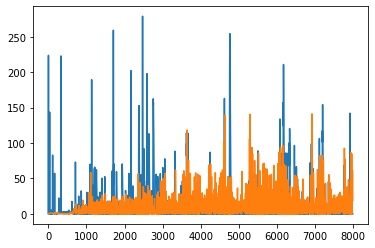

In [19]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [30]:
from keras.models import load_model
model =load_model('/content/models/trained_generated_model.h5')

In [31]:
latent_points = generate_latent_points(10, 300)
X = model.predict(latent_points)
data_fake = pd.DataFrame(data=X,  columns=features)
data_fake.head()

,ntl_area_mn,ntl_cai_mn,ntl_clumpy,ntl_cohesion,ntl_contig_mn,ntl_dcad,ntl_ed,ntl_lpi,ntl_lsi,ntl_np,...,ntl_count,ntl_median,ntl_variance,totpop,LENGTH,COUNT,coastal,Longitude,Latitude,bins
0,589.4565,-97.5628,-55.1302,7.6190,35.7365,1.8743,-38.4140,-32.4248,-26.4041,-14.0745,...,-46.7701,-37.8494,-59.3398,-74.1338,4.4448,-34.7875,68.9773,1.1032,57.0796,17.2546
1,367.0815,-91.5631,-46.6275,1.1051,18.6278,5.7076,-18.8579,-13.6319,-12.3587,7.8117,...,14.4669,-33.2809,-53.3957,-41.4974,-3.4517,-23.7526,51.8048,-12.3247,40.1221,11.6883
2,500.9384,-103.4796,-52.7044,3.1937,25.5989,6.3413,-28.7010,-24.4450,-15.9329,2.1566,...,-12.7015,-37.3008,-61.9428,-61.3549,-0.1481,-32.5966,67.4160,-3.4277,50.3191,16.8374
3,353.1748,-78.3753,-42.1222,2.0944,17.9610,5.7641,-19.6608,-16.5108,-13.9023,4.3506,...,-1.6575,-30.2836,-46.9541,-43.9751,-2.4617,-24.2174,46.6185,-8.3044,36.1966,10.4388
4,456.1364,-91.9227,-45.6921,-0.2146,21.6671,5.8575,-22.6871,-22.3945,-15.9612,-0.4928,...,-6.5817,-33.4267,-54.1544,-56.4346,0.3795,-28.0254,56.6144,-7.1562,47.0797,12.7608


In [32]:
data_fake['bins'].describe()

count   300.0000
mean     12.1911
std       2.4882
min       7.1961
25%      10.3528
50%      11.9475
75%      13.5572
max      19.9826
Name: bins, dtype: float64

In [33]:
outcome_mean = data_fake.COUNT.mean()
data_fake['bins'] = np.floor(data_fake['bins'])
data_fake["bins"] = data_fake["bins"].astype(int)

In [34]:
data_fake["bins"].describe()

count   300.0000
mean     11.6867
std       2.5065
min       7.0000
25%      10.0000
50%      11.0000
75%      13.0000
max      19.0000
Name: bins, dtype: float64

In [35]:
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [36]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)
y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of fake data model: 0.6444444444444445
Classification report of fake data model:               precision    recall  f1-score   support

           7       0.00      0.00      0.00         2
           8       0.67      0.29      0.40         7
           9       0.57      1.00      0.73        12
          10       0.70      0.64      0.67        11
          11       0.82      1.00      0.90        18
          12       0.80      0.53      0.64        15
          13       0.27      0.75      0.40         4
          14       1.00      0.38      0.55         8
          15       1.00      0.40      0.57         5
          16       0.50      0.60      0.55         5
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2

    accuracy                           0.64        90
   macro avg       0.49      0.43      0.42        90
weighted avg       0.69      0.64      0.62 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [37]:

!pip install table_evaluator

In [38]:
from table_evaluator import load_data, TableEvaluator
categorical_cols=[ 'coastal', 'bins']
table_evaluator = TableEvaluator(data, data_fake,cat_cols=categorical_cols)
table_evaluator.evaluate(target_col='bins')

/usr/local/lib/python3.7/dist-packages/table_evaluator/metrics.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.1500   0.3167              0.0811
DecisionTreeClassifier_real   0.4167   0.0000              0.0000
LogisticRegression_fake       0.0000   0.2833              0.0435
LogisticRegression_real       0.2667   0.0500              0.0000
MLPClassifier_fake            0.0333   0.1167              0.0084
MLPClassifier_real            0.1833   0.0500              0.0084
RandomForestClassifier_fake   0.1000   0.2667              0.0345
RandomForestClassifier_real   0.3000   0.1333              0.0526

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    4.3730
nearest neighbor std                     2.2204

Miscellaneous results:
                                  Result
Column Cor

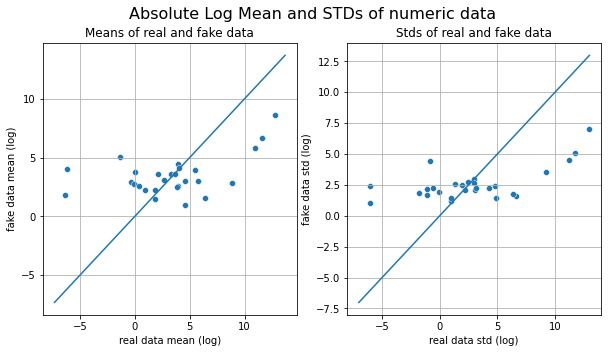

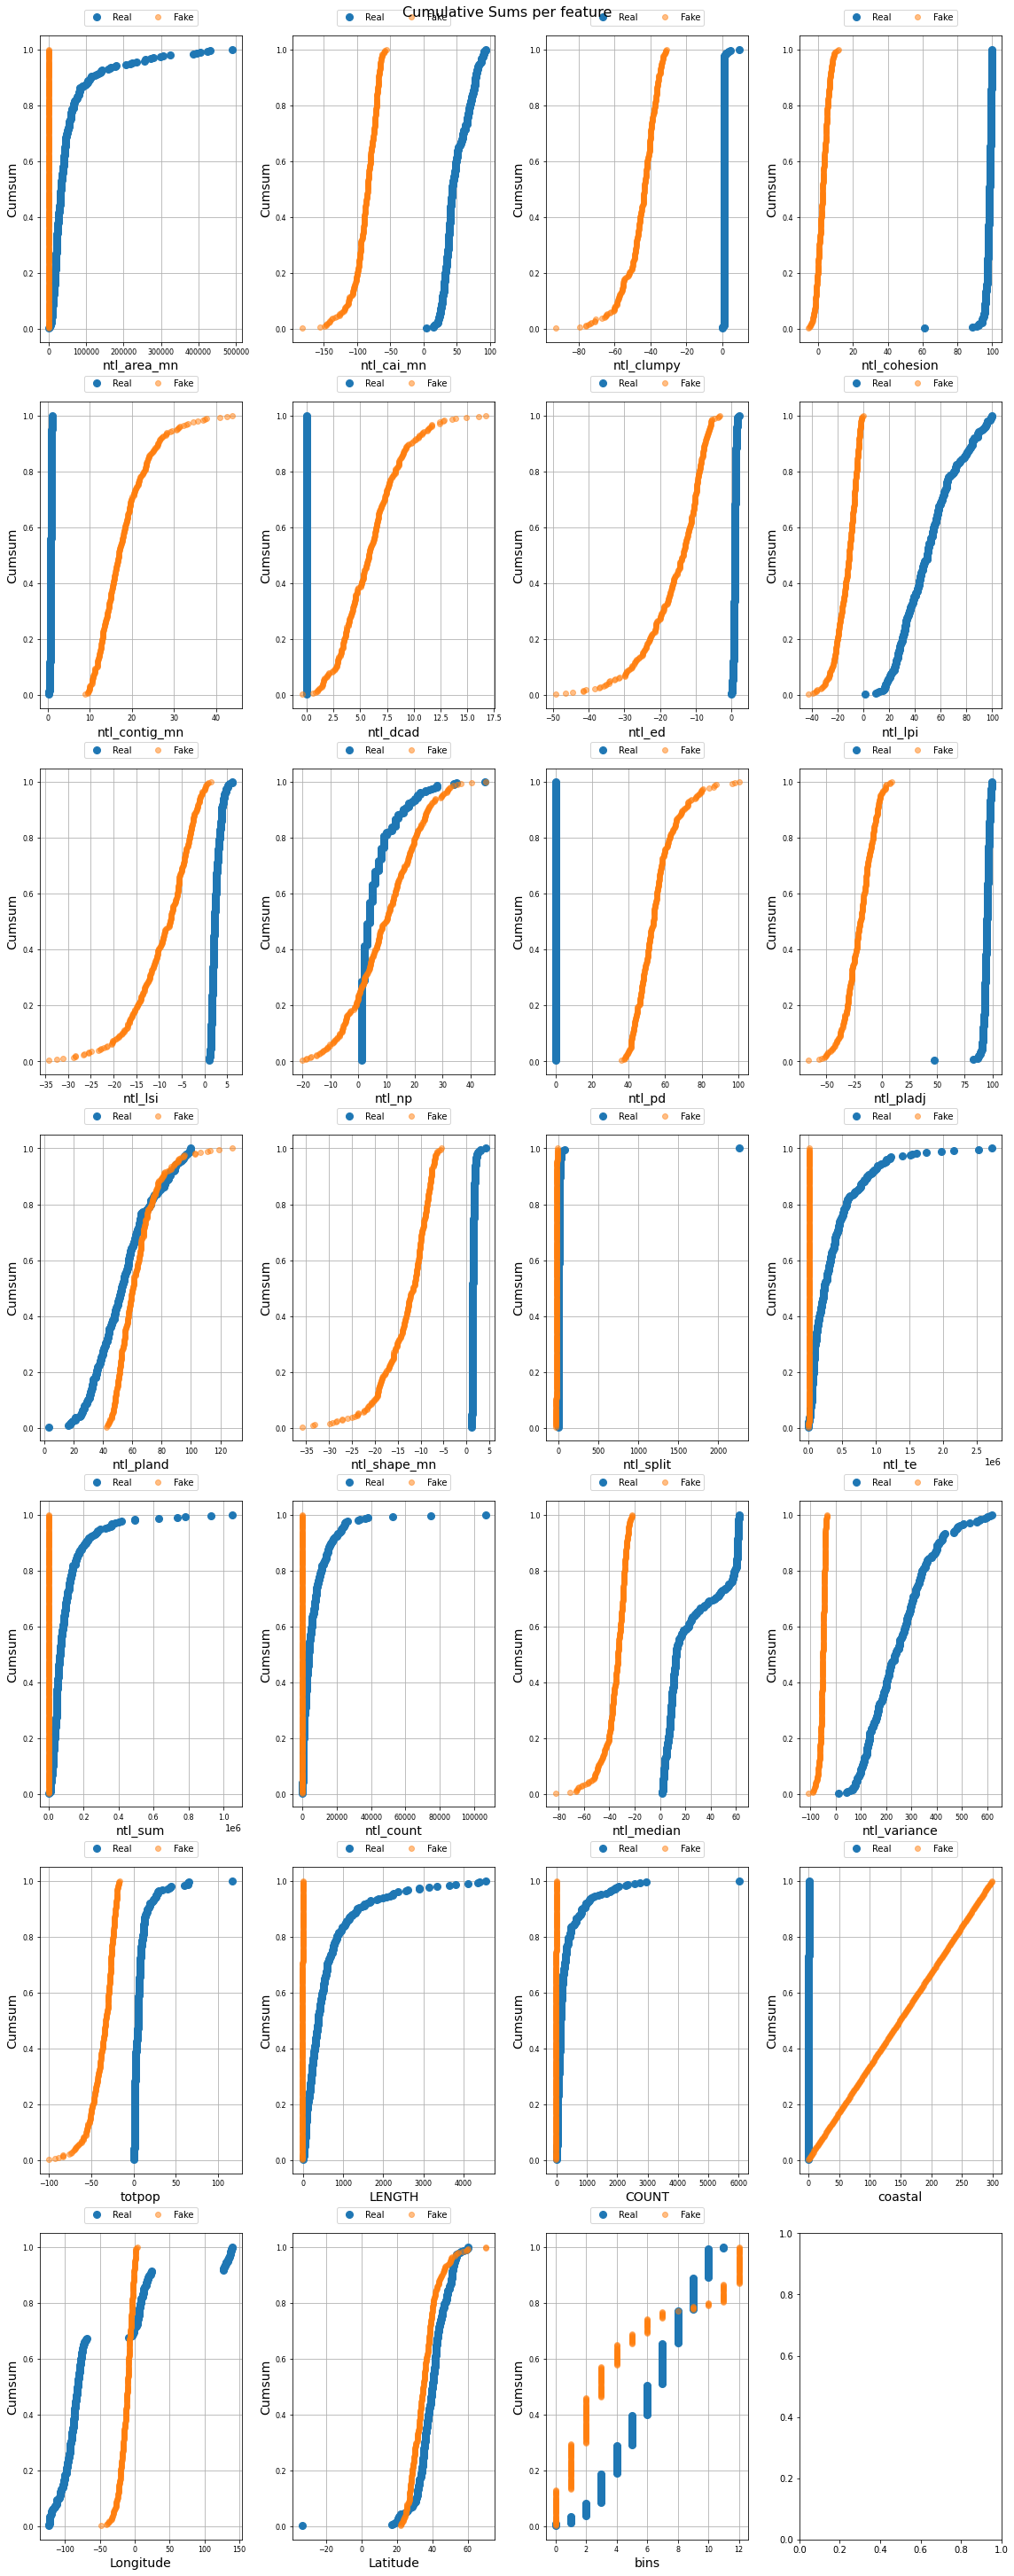

ValueError: ignored

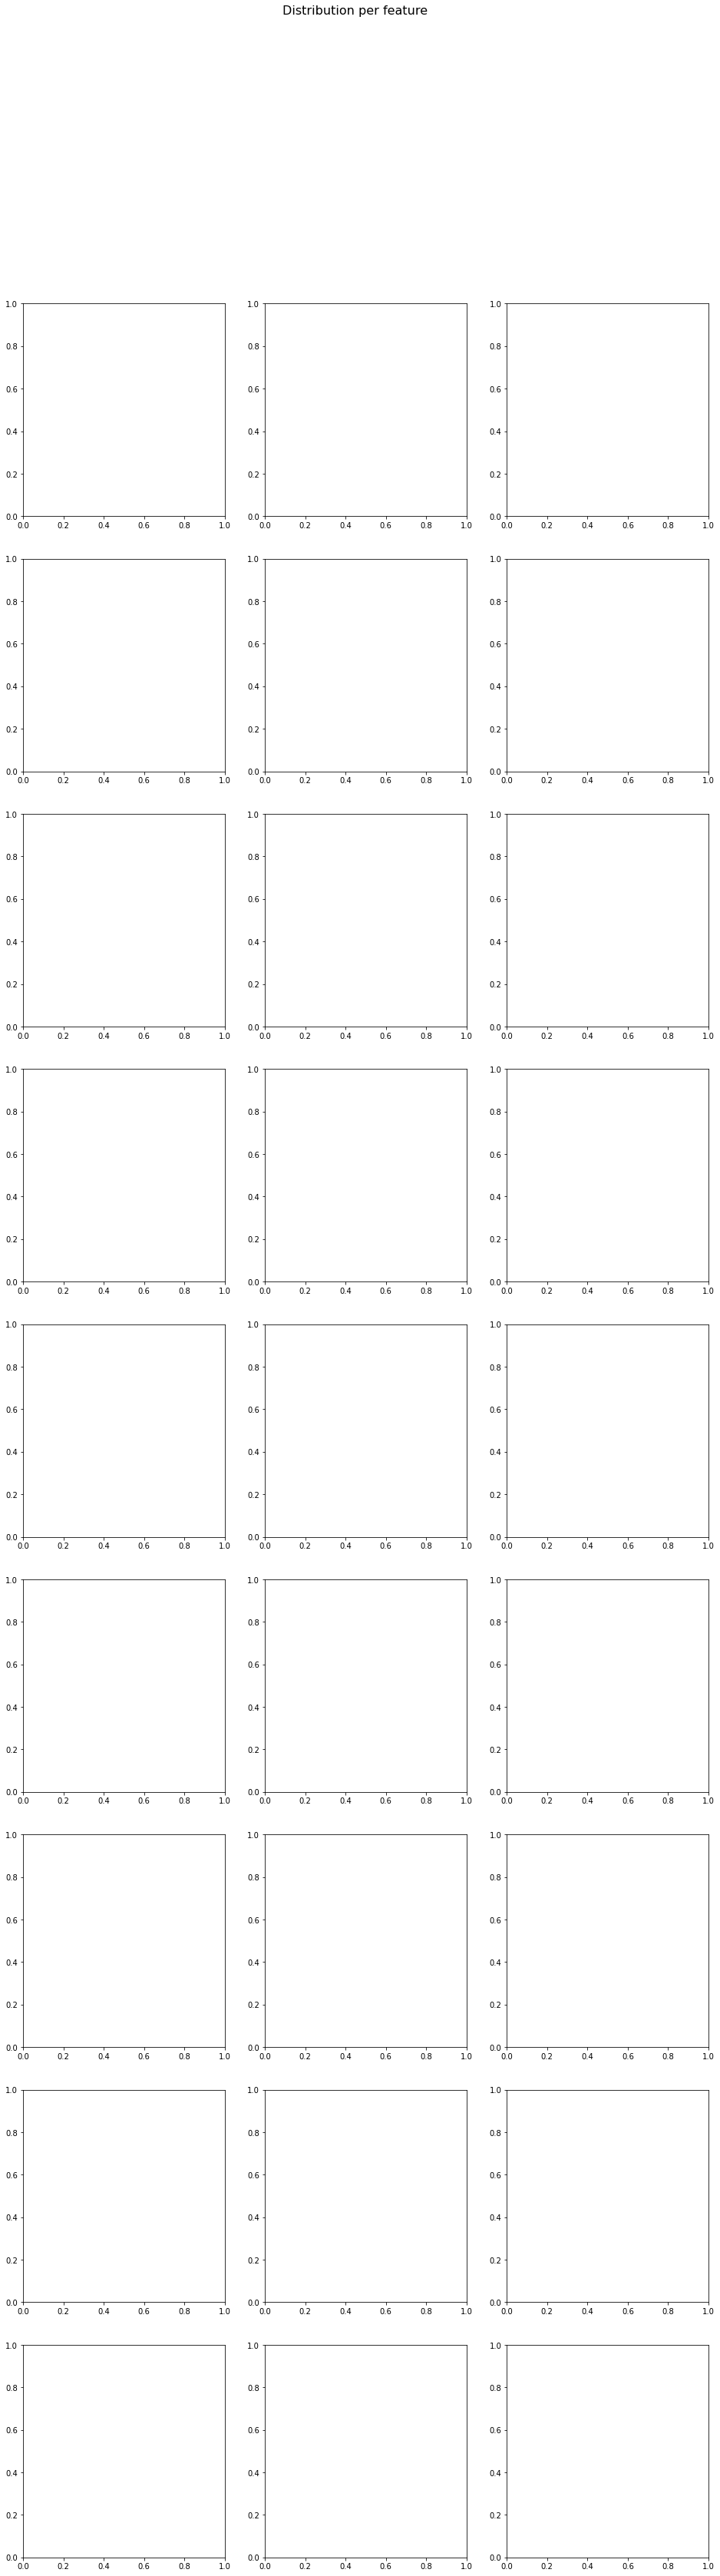

In [39]:

table_evaluator.visual_evaluation()


In [40]:
import math
from sklearn.ensemble import RandomForestRegressor

X = data[features]
y = data[label]
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = RandomForestRegressor()
model.fit(X_true_train,y_true_train)
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("RMSE:               ", math.sqrt(mse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RMSE:                0.1841200578283535


In [41]:
Xf = data_fake[features]
yf = data_fake[label]
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(Xf, yf, test_size=0.30, random_state=42)
model = RandomForestRegressor()
model.fit(X_true_train,y_true_train)
y_hat = model.predict(Xf)
mae = metrics.mean_absolute_error(yf,y_hat)
mse = metrics.mean_squared_error(yf,y_hat)
print ("RMSE:               ", math.sqrt(mse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RMSE:                0.12030932355114192


In [ ]:
! pip install fitter

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

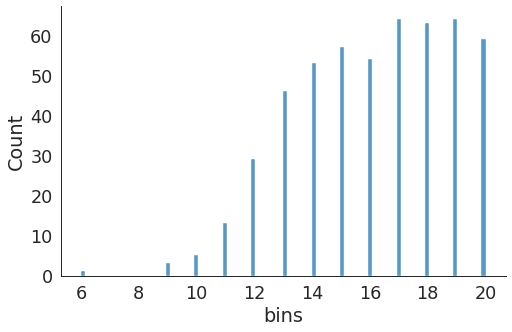

In [43]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data, x="bins", kind="hist", bins = 100, aspect = 1.5)

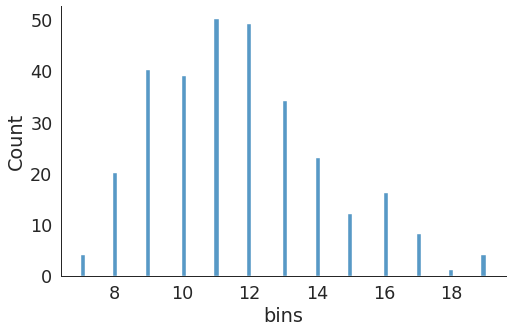

In [44]:
sns.displot(data=data_fake, x="bins", kind="hist", bins = 100, aspect = 1.5)